# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [3]:
#your code here
import requests
import StringIO
import zipfile

r = requests.get('http://seanlahman.com/files/database/baseballdatabank-master_2016-03-02.zip', stream=True)

In [4]:
if r.status_code == requests.codes.ok:
    try:
        data = StringIO.StringIO(r.content)
    except:
        print 'Unable to load files to buffer'
        exit()

In [5]:
zipf = zipfile.ZipFile(data)

In [6]:
if zipf.testzip() is None: #no bad file in zip
    zipf.extractall()

In [7]:
%ls baseballdatabank-master/core/

AllstarFull.csv          Fielding.csv             Pitching.csv
Appearances.csv          FieldingOF.csv           PitchingPost.csv
AwardsManagers.csv       FieldingPost.csv         Salaries.csv
AwardsPlayers.csv        HallOfFame.csv           Schools.csv
AwardsShareManagers.csv  HomeGames.csv            SeriesPost.csv
AwardsSharePlayers.csv   Managers.csv             Teams.csv
Batting.csv              ManagersHalf.csv         TeamsFranchises.csv
BattingPost.csv          Master.csv               TeamsHalf.csv
CollegePlaying.csv       Parks.csv                readme2014.txt


In [8]:
import pandas as pd

filesroot = 'baseballdatabank-master/core/'
salaries = pd.read_csv(filesroot + 'Salaries.csv')
teams = pd.read_csv(filesroot + 'Teams.csv')
salaries[.head()]

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [9]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [10]:
#your code here
sample = salaries.head()
sample

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [11]:
yearly_team_sal = salaries.groupby(['teamID', 'yearID']).sum()

In [12]:
yearly_team_sal.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

In [13]:
type(yearly_team_sal)

pandas.core.frame.DataFrame

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [14]:
#your code here
yearly_team_wins = teams[['yearID', 'teamID', 'W']]
yearly_team_wins.head()

,yearID,teamID,W
0,1871,BS1,20
1,1871,CH1,19
2,1871,CL1,10
3,1871,FW1,7
4,1871,NY2,16


In [15]:
yearly_team_sal = yearly_team_sal.reset_index()
wins_vs_sal = pd.merge(yearly_team_sal, yearly_team_wins, on=['yearID', 'teamID'])
wins_vs_sal.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


In [16]:
wins_vs_sal.head()

,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [17]:
#your code here
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
wins_vs_sal[wins_vs_sal['yearID'] == 2002]

,teamID,yearID,salary,W
5,ANA,2002,61721667,99
12,ARI,2002,102819999,98
43,ATL,2002,92870367,101
74,BAL,2002,60493487,67
105,BOS,2002,108366060,93
148,CHA,2002,57052833,81
179,CHN,2002,75690833,67
210,CIN,2002,45050390,78
241,CLE,2002,78909449,74
264,COL,2002,56851043,73


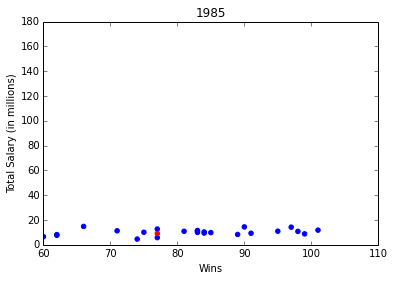

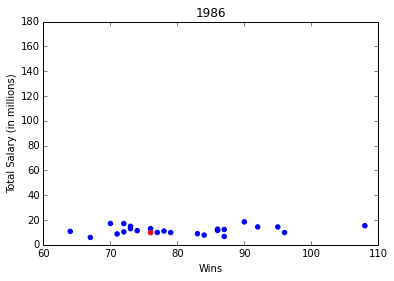

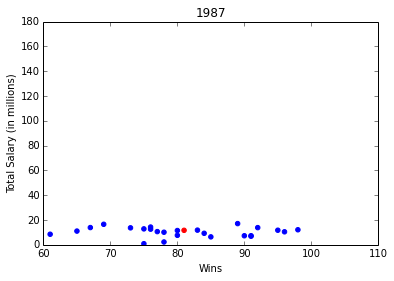

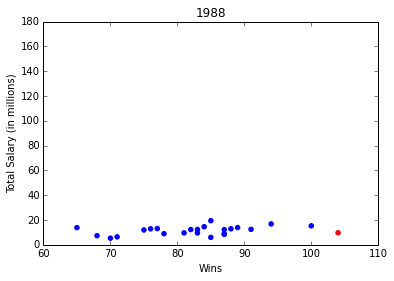

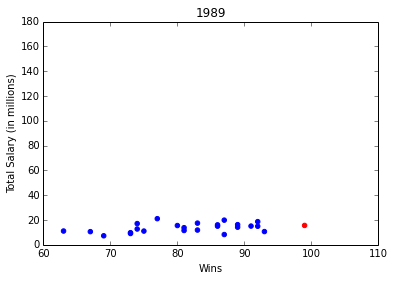

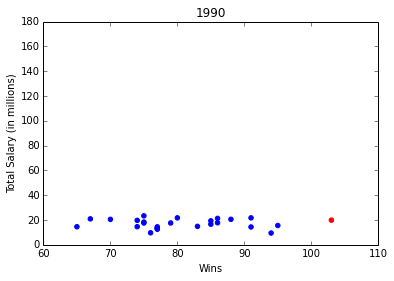

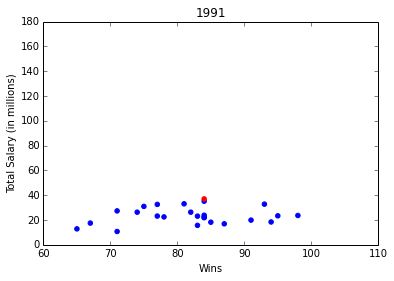

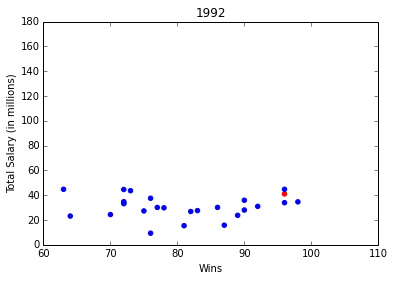

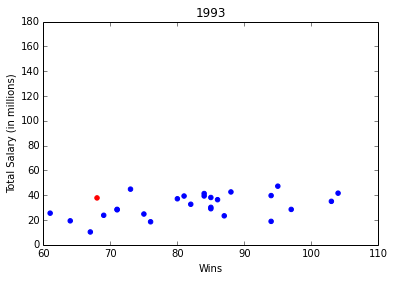

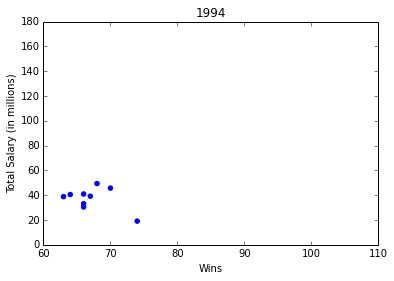

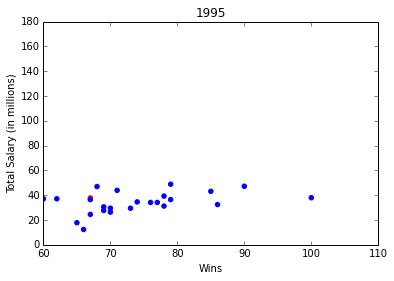

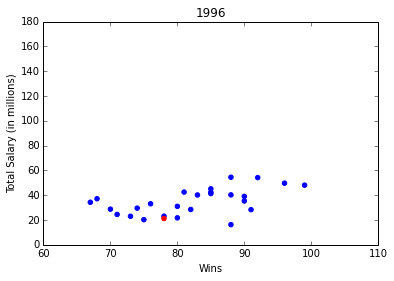

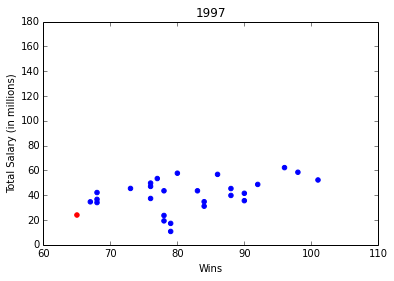

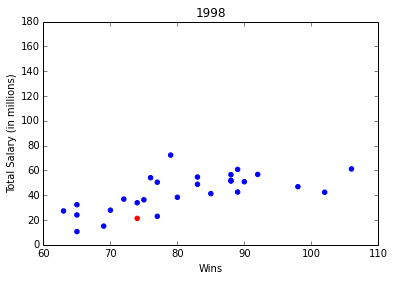

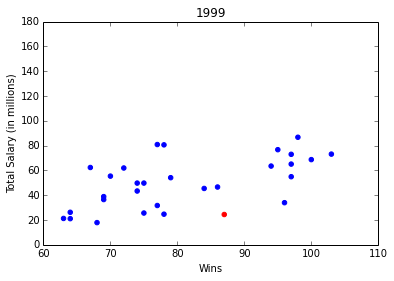

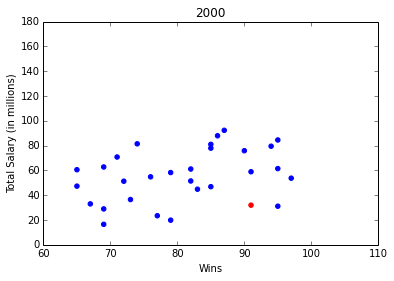

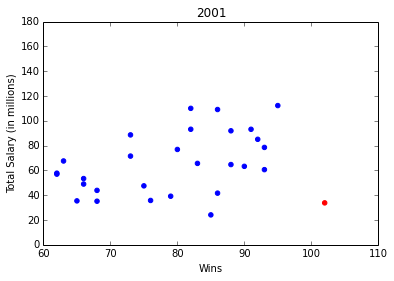

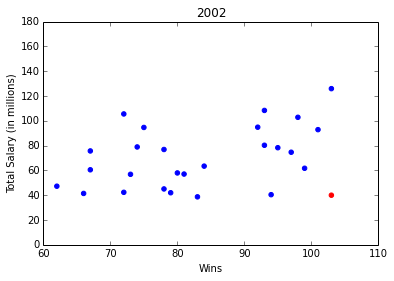

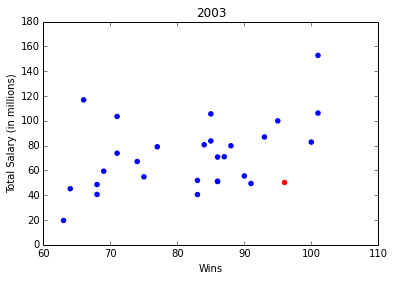

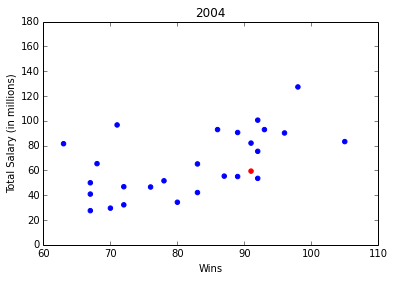

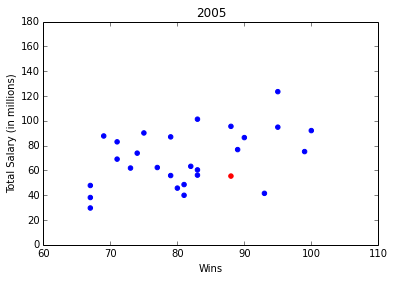

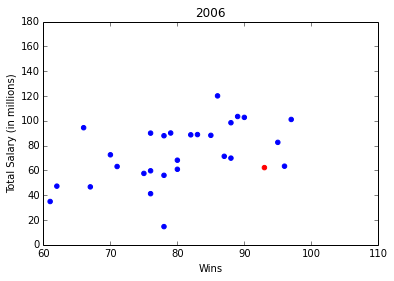

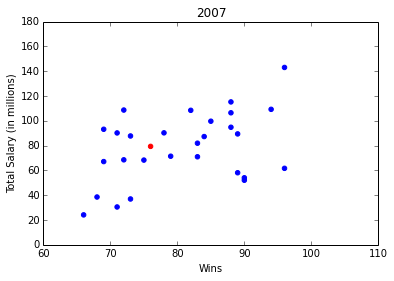

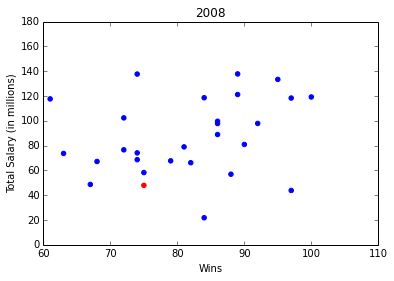

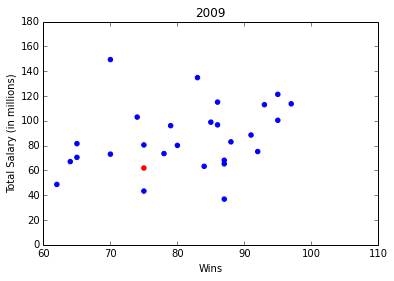

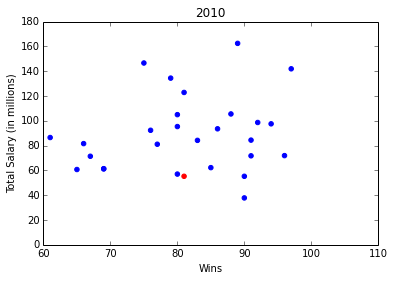

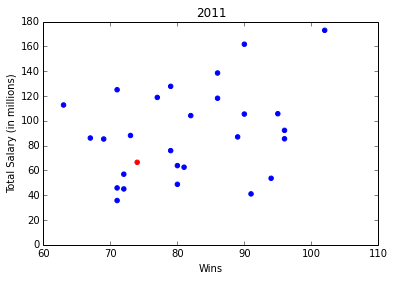

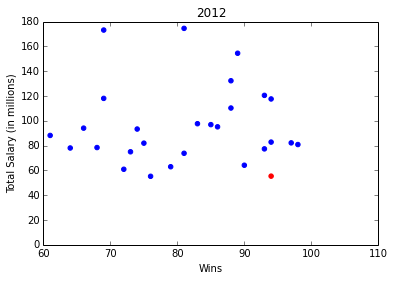

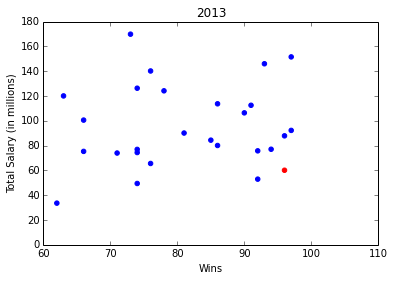

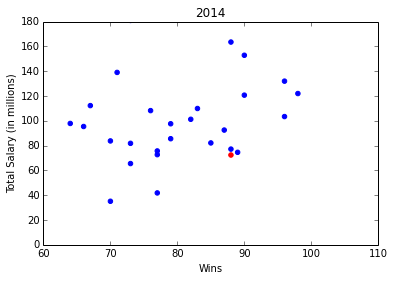

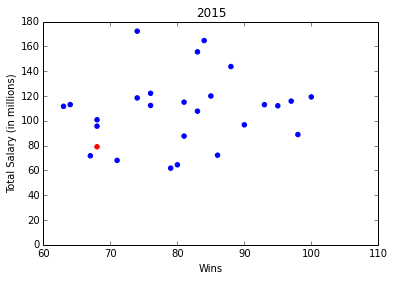

In [52]:
fig = plt.figure()
for y in range(wins_vs_sal['yearID'].min(), wins_vs_sal['yearID'].max() + 1):
    for row in wins_vs_sal[wins_vs_sal['yearID'] == y].itertuples():
        color = 'b'
        if row[1] == 'OAK':
            color = 'r'
        plt.scatter(row[4], row[3] / 1e6, color=color)
        plt.title('Wins versus Salaries in year ' + str(y))
        plt.xlabel('Wins')
        plt.ylabel('Total Salary (in millions)')
        plt.axis([60, 110, 0, 180])
        plt.title(y)
    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [20]:
#your code here

## Discussion for Problem 1

*Based on the Data Analyis above the Oakland Athletics had a considerable competitive advantage between 2001 and 2003.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [21]:
#your code here

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [22]:
#your code here

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [23]:
#your code here

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

In [24]:
#your code here

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [25]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

"\nFunction\n--------\nmergeByYear\n\nReturn a merged DataFrame containing the income, \ncountry name and region for a given year. \n\nParameters\n----------\nyear : int\n    The year of interest\n\nReturns\n-------\na DataFrame\n   A pandas DataFrame with three columns titled \n   'Country', 'Region', and 'Income'. \n\nExample\n-------\n>>> mergeByYear(2010)\n"

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [26]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [27]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

'\nFunction\n--------\nratioNormals\n\nReturn ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a) as function of \n    the difference in the average of X \n    and the average of Y. \n\nParameters\n----------\ndiff : difference in the average of X \n    and the average of Y. \na : cutoff value\n\nReturns\n-------\nReturns ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a)\n    \nExample\n-------\n>>> ratioNormals(diff = 1, a = 2)\n'

In [28]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [29]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [30]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [31]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
